<a href="https://colab.research.google.com/github/ilya-lykov/google_colab_labs/blob/main/2_lab/Laba_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType
import pyspark.sql.functions as F
from pyspark.sql import Window as W
import matplotlib.pyplot as plt

In [ ]:
spark = (SparkSession
    .builder
    .appName("Test")
    .getOrCreate()
)

In [ ]:
!ls

drive  sample_data


In [ ]:
acc_2014 = spark.read.csv("/content/drive/MyDrive/University/data/2014/DfTRoadSafety_Accidents_2014.csv", header=True, inferSchema=True)
veh_2014 = spark.read.csv("/content/drive/MyDrive/University/data/2014/DfTRoadSafety_Vehicles_2014.csv", header=True, inferSchema=True)
cas_2014 = spark.read.csv("/content/drive/MyDrive/University/data/2014/DfTRoadSafety_Casualties_2014.csv", header=True, inferSchema=True)

In [ ]:
accidents_2014 = acc_2014.join(veh_2014, ["Accident_Index"], "inner").join(cas_2014, ["Accident_Index"], "inner")
accidents_2014.show()

+--------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-------------------+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+-----------------+------------+-----------------------+-----------------+--------------------------------+-----------------+------------------------+-------------------------+---------------------------+--------------------------+-------------------+----------------------------+-------------------------+-------------+-------------+------------------+------------

In [ ]:
acc_2015 = spark.read.csv("/content/drive/MyDrive/University/data/2015/DfTRoadSafety_Accidents_2015.csv", header=True, inferSchema=True)
veh_2015 = spark.read.csv("/content/drive/MyDrive/University/data/2015/DfTRoadSafety_Vehicles_2015.csv", header=True, inferSchema=True)
cas_2015 = spark.read.csv("/content/drive/MyDrive/University/data/2015/DfTRoadSafety_Casualties_2015.csv", header=True, inferSchema=True)

In [ ]:
accidents_2015 = acc_2015.join(veh_2015, ["Accident_Index"], "inner").join(cas_2015, ["Accident_Index"], "inner")
accidents_2015.show()

+--------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-------------------+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+-----------------+------------+-----------------------+-----------------+--------------------------------+-----------------+------------------------+-------------------------+---------------------------+--------------------------+-------------------+----------------------------+-------------------------+-------------+-------------+------------------+------------

In [ ]:
accidents = accidents_2015.union(accidents_2014)
accidents.show()

+--------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-------------------+--------------------------+-------------------------+--------------+---------------+---------+-----------+---------------+----------------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+-------------------------+-----------------+------------+-----------------------+-----------------+--------------------------------+-----------------+------------------------+-------------------------+---------------------------+--------------------------+-------------------+----------------------------+-------------------------+-------------+-------------+------------------+------------

In [ ]:
average_speed_limit = (
    accidents.groupBy("Speed_limit")
    .agg(F.avg("Number_of_Vehicles").alias("average_vehicles"))
).filter(F.col("Speed_limit")>0)
average_speed_limit = average_speed_limit.orderBy("Speed_limit")
average_speed_limit.show()

+-----------+------------------+
|Speed_limit|  average_vehicles|
+-----------+------------------+
|         10|1.6666666666666667|
|         20|1.9909921339761483|
|         30| 2.110592761589681|
|         40|2.3232932300745865|
|         50|  2.51431189693278|
|         60|2.2474488207190455|
|         70|3.6418282103459356|
+-----------+------------------+



In [ ]:
result = average_speed_limit.toPandas()

<Axes: xlabel='Speed_limit'>

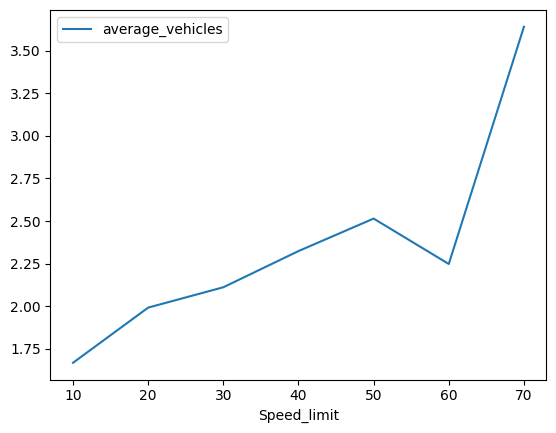

In [ ]:
result.plot(
    x="Speed_limit",
    y="average_vehicles"
)

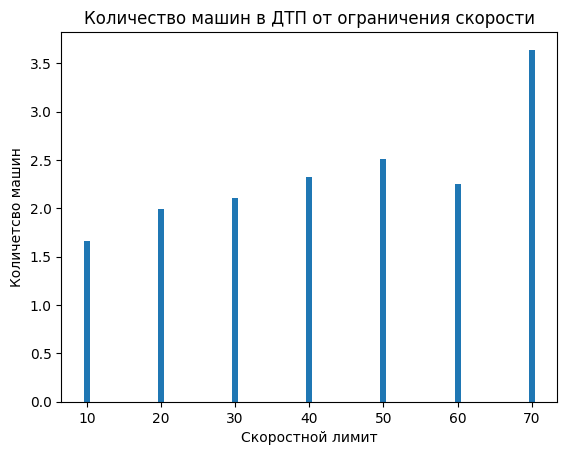

In [ ]:
plt.title('Количество машин в ДТП от ограничения скорости')
plt.bar(result['Speed_limit'], result['average_vehicles'])
plt.xlabel('Скоростной лимит')
plt.ylabel('Количетсво машин')
plt.show()